In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import rasterio as rio
from rasterio.plot import reshape_as_image
import maskslic as seg
import skimage.segmentation as seg2


In [2]:
slic_dir = '/home/jp/Pictures/new_slic/'
output_dir = '/home/jp/Pictures/new_output/'
c2_matrix = '/home/jp/Downloads/AREA_3_mat.tif'

In [74]:
def rescale_img(src, w, h):
    data = src.read(
        out_shape=(
            src.count,
            w,
            h
        ),
        )

# scale image transform
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    return data

def test(filepath, n_segments, enforce_connectivity, distance, spatial_weight, filename='file', max_iter=10, compactness=0.1, color_image=None, w=None, h=None, mask=None):
    with rio.open(filepath) as src:
        if w and h:
            image = rescale_img(src, w, h)
        else:
            image = src.read()
        image = reshape_as_image(image)

        # if mask is not None:
        #     mask = rescale_img(rasterio.open('/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif'), image.shape[0], image.shape[1])
        #     mask = mask[1]

        # Remover valores iguais a 0 para evitar problemas
        zero_mask = (image == 0)
        random_numbers = np.random.rand(*image.shape)
        image[zero_mask] = random_numbers[zero_mask]
        print('antes do slic')
        print(type(max_iter))
        vv_slic = seg.slic(image, n_segments=n_segments, max_iter=max_iter, compactness=compactness, enforce_connectivity=True, distance=distance, spatial_weight=spatial_weight, mask=mask)
        print('antes do mark')
        if color_image is None:
            display_image = image[:, :, 2]/np.max(image[:, :, 2])
        else:
            display_image = color_image
        image_with_bounds = seg2.mark_boundaries(image=display_image, label_img=vv_slic)
        print('depois do mark')
        plt.imshow(image_with_bounds)
        plt.imsave(output_dir + filename +'.png', image_with_bounds)
        np.save(slic_dir +filename + '.npy', vv_slic)
        return vv_slic

In [4]:
color_image = '/home/jp/Documents/IME/TCC/NEW/areas_tif/AE-X03-8b_B7.tif'
color_src = rasterio.open(color_image)
color_img = color_src.read()
color_img = color_img.transpose(1, 2, 0)

In [6]:
color_img.shape

(998, 977, 1)

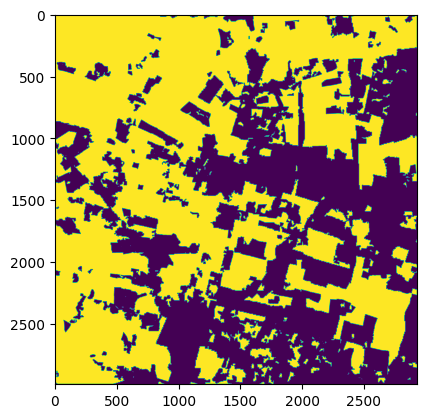

In [57]:
mascara = '/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif' 
mascara_src = rasterio.open(mascara)
mascara = mascara_src.read()
# m = mascara.transpose(1,2,0)
mask = mascara[1]
plt.imshow(mask)
mask[mask==255] = 1

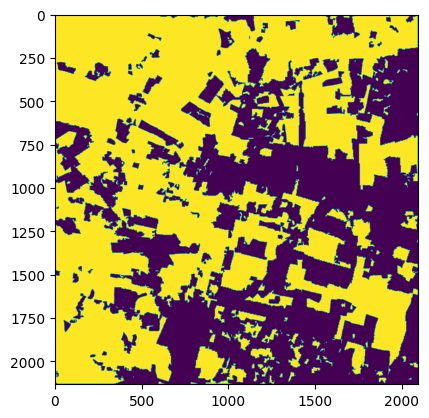

In [65]:
mascara = '/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif' 
mascara_src = rasterio.open(mascara)

mascara = '/home/jp/Downloads/AE_X03_S2_3CL_8b_3bandas.tif' 
mascara_src = rasterio.open(mascara)

# m = mascara.transpose(1,2,0)


data = mascara_src.read(
    out_shape=(
        mascara_src.count,
        2132,
        2093
    ),
    )

# scale image transform
transform = mascara_src.transform * mascara_src.transform.scale(
    (mascara_src.width / data.shape[-1]),
    (mascara_src.height / data.shape[-2])
)

mask = data[1]
plt.imshow(mask)
mask[mask==255] = 1

In [66]:
mask.shape

(2132, 2093)

antes do slic
<class 'int'>
DISTÂNCIA:
0
0
1
2
3
4
5
6
7
8
9
antes do mark
depois do mark


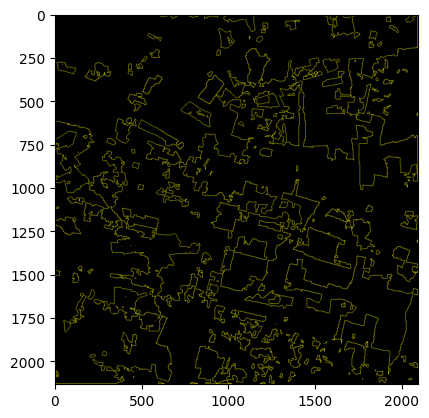

In [76]:
filename = 'wishart_mask_10000'
slic = test(c2_matrix, 10000, False, 0, 5, filename, mask=mask, color_image=mask) 

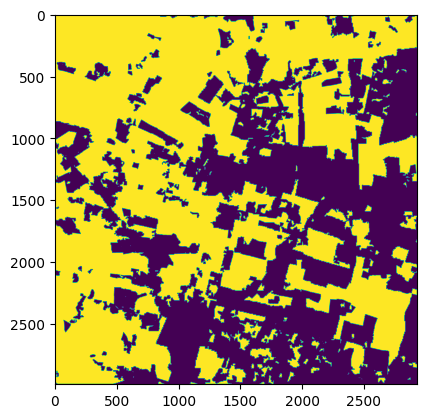

In [23]:
plt.imshow(mask)

In [59]:
mask.shape

(2990, 2928)

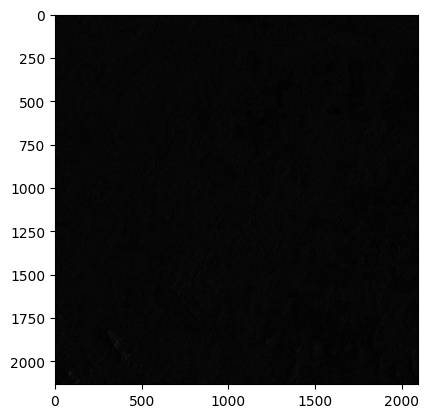

In [44]:
plt.imshow((image[:, :, 3]/np.max(image[:, :, 0:3]))*255, cmap='gray')

In [40]:
im = image[:, :, 3]/np.max(image[:, :, 3])

In [41]:
np.max(im)

1.0

In [25]:
with rio.open(c2_matrix) as src:
    image = src.read()
    image = reshape_as_image(image)
    image.shape

In [26]:
image.shape

(2132, 2093, 4)

In [27]:
mask.shape

(2990, 2928)

In [47]:
with rio.open('/home/jp/Pictures/teste.tif') as src:
    teste = src.read()
    teste = reshape_as_image(teste)
    teste.shape
plt.imshow(teste[3])

RasterioIOError: Read or write failed. /home/jp/Pictures/teste.tif, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedStrip() failed.